## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.
    
IV: Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [99]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HomeW"       "HouseholdS"  "INT1"        "INT2"        "INT3"       
 [56] "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [61] "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W" 
 [66] "IncHomeS"    "IncHomeW"    "IncWD"       "Income"      "Latitude"   
 [71] "MC"          "MC1"         "MC2"         "MC3"         "MC4"        
 [76] "MC5"         "OwnRent"     "PBC1"        "PBC2"        "PBC3R"      
 [81] "PBC4"        "PBC5"        "Political"   "RewardForm"  "SN"         
 [86] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
 [91] "SqftCate"    "State"       "SubNorm"     "SubNorm1"    "SubNorm2"   
 [96] "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"     
[101] "Trust2"      "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC"
[106] "Winter_avgF" "X.9to5"

In [102]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [103]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 102
[1] 490 102


In [104]:
#names(data2)
#These are only variables we really care about
IVS = c(
#"Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeS",
"State",
"Summer_avgF")

In [105]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC1"    "EnergyC2"    "EnergyC3"    "EnergyC4"   
 [31] "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"     "Gender"     
 [36] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [41] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [46] "HabitE3"     "HabitG"      "HomeS"       "HouseholdS"  "INT1"       
 [51] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [56] "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [61] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"      "Latitude"   
 [66] "MC"          "MC1"         "MC2"         "MC3"         "MC4"        
 [71] "MC5"         "OwnRent"     "PBC1"        "PBC2"        "PBC3R"      
 [76] "PBC4"        "PBC5"        "Political"   "RewardForm"  "SN"         
 [81] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
 [86] "SqftCate"    "State"       "SubNorm"     "SubNorm1"    "SubNorm2"   
 [91] "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"     
 [96] "Trust2"      "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC"
[101] "Winter_avgF" "X.9to5"

[1] "Atti"        "ComfNS"      "Educ"        "EnergyC"     "Ethnic"     
 [6] "Frugal"      "Gender"      "HabitC"      "HabitG"      "HomeS"      
[11] "HouseholdS"  "Income"      "Latitude"    "MC"          "OwnRent"    
[16] "PBC"         "Political"   "SN"          "SqftCate"    "State"      
[21] "SubNorm"     "Summer_avgF" "Trust"

In [106]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];
sort(names(data1))

[1] "Atti"        "ComfNS"      "Educ"        "Ethnic"      "Gender"     
 [6] "HabitC"      "HabitG"      "HomeS"       "HouseholdS"  "IncHomeS"   
[11] "Income"      "Latitude"    "MC"          "OwnRent"     "Political"  
[16] "SN"          "SqftCate"    "State"       "SubNorm"     "Summer_avgF"

In [107]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [108]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [109]:
#data1 [is.na(data1$IncHomeS), ]

In [110]:
#summary(data1$IncHomeS)
#table(data1$IncHomeS)
#table(data1$HouseholdS)

In [111]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncHomeS"    "State"       "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "MC"          "ComfNS"      "Atti"       
[16] "SubNorm"     "SN"          "HabitG"      "HabitC"      "Summer_avgF"

In [112]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [113]:
#convert all data to numeric values

sapply(data2,sd)

HomeS    IncHomeS       State      Gender     OwnRent    SqftCate 
       3.82        1.76       17.04        0.50        0.51        1.13 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.21        0.85        0.35        1.98        1.12        5.09 
         MC      ComfNS        Atti     SubNorm          SN      HabitG 
       1.08        1.41        1.08        1.34        1.40        1.16 
     HabitC Summer_avgF 
       1.38        5.26

In [114]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.83
Summer_avgF,-0.83,1.00


In [115]:
#plot(data2$SN,data2$SubNorm,pch=".",scatter=)

In [116]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    HomeS Gender Latitude    MC  Atti SubNorm    SN HabitG HabitC Summer_avgF
PC1 -0.27  -0.22     0.23 -0.37 -0.41   -0.38 -0.25  -0.31   -0.3       -0.24
[1] 0.24
    HomeS OwnRent SqftCate HouseholdS Political Income
PC2  0.23    0.48     0.53       0.32      -0.2   0.42
[1] 0.34
    Latitude ComfNS HabitC Summer_avgF
PC3     0.54  -0.25   0.23       -0.55
[1] 0.41
    HomeS Gender HouseholdS Income Educ ComfNS    SN
PC4  0.25  -0.37      -0.47   0.22 0.53  -0.25 -0.21
[1] 0.48
    State Political Ethnic ComfNS HabitG HabitC
PC5 -0.27      0.51   -0.5  -0.28  -0.26  -0.21
[1] 0.53
    IncHomeS HouseholdS Political  Educ ComfNS    SN
PC6    -0.61       0.22     -0.33 -0.24  -0.47 -0.22
[1] 0.58
    HomeS IncHomeS State Gender Ethnic HabitG
PC7 -0.31     0.35  0.54  -0.21  -0.42   0.34
[1] 0.63
    Gender    MC  Atti SubNorm   SN
PC8  -0.34 -0.42 -0.27     0.3 0.63
[1] 0.68
    State Gender Political    MC ComfNS HabitG
PC9  0.53   0.58      0.25 -0.23  -0.22  -0.25
[1] 0.72


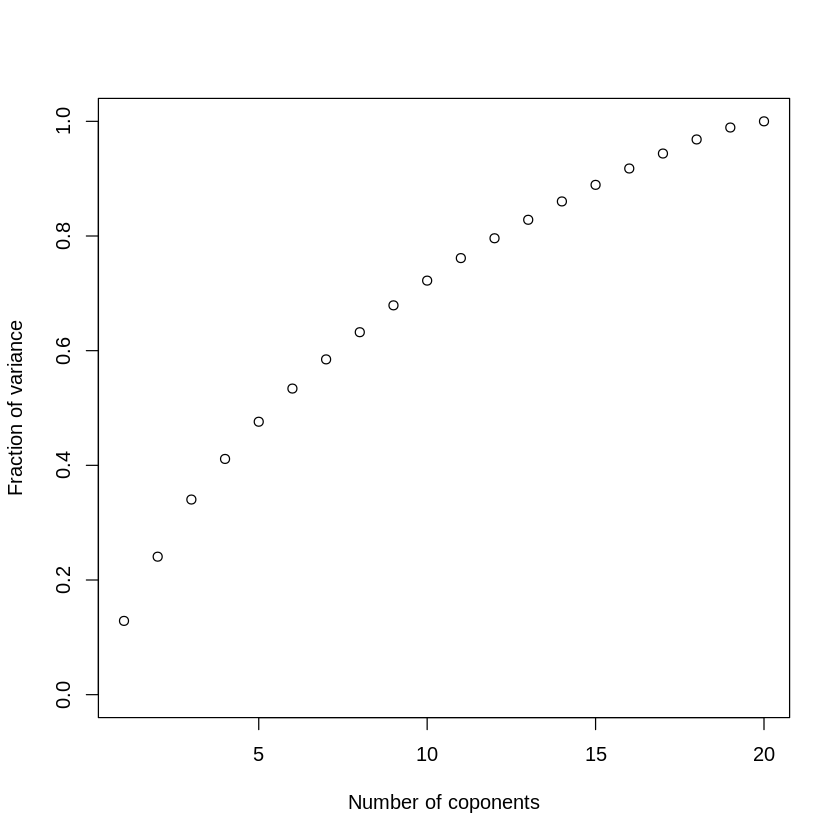

In [117]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [118]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [119]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,20,0.62
Latitude,12,0.61
SqftCate,6,0.40
OwnRent,5,0.31
Atti,15,0.31
Income,10,0.29
SubNorm,16,0.26
HouseholdS,7,0.24
MC,13,0.23
HabitG,18,0.19
ComfNS,14,0.18


In [120]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeS    IncHomeS       State      Gender     OwnRent    SqftCate 
       0.85        0.99        0.97        0.99        0.63        0.31 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       0.83        0.97        0.96        0.73        0.99        0.34 
         MC      ComfNS        Atti     SubNorm          SN      HabitG 
       0.98        0.98        0.99        1.00        0.97        0.99 
     HabitC Summer_avgF 
       1.00        0.11 

Loadings:
            Factor1 Factor2
Latitude    -0.81          
Summer_avgF  0.94          
OwnRent              0.61  
SqftCate             0.83  
Income               0.52  
HomeS        0.32          
IncHomeS                   
State                      
Gender                     
HouseholdS           0.41  
Political                  
Ethnic                     
Educ                       
MC                         
Comf

In [121]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [122]:
#Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
#   Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avgF

In [123]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'MC', 'ComfNS', 'HabitC', 'Summer_avgF')

In [124]:
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [125]:
table(data2[,"IncHomeS"])
data2$StateCA=data2$State==5
table(data2$StateCA)


  1   2   3   4   5   6   7   8 
 38  30  94 176  44  45  36  27 


FALSE  TRUE 
  469    21 

In [126]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.991 -1.028 -0.175  0.978  4.272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.4083     2.5372    2.13    0.034 *  
Gender        0.0782     0.1615    0.48    0.628    
OwnRent       0.3692     0.1768    2.09    0.037 *  
SqftCate      0.0640     0.0872    0.73    0.463    
HouseholdS   -0.1231     0.0717   -1.72    0.086 .  
Political     0.0146     0.0941    0.16    0.877    
Ethnic       -0.3041     0.2273   -1.34    0.182    
Income       -0.0101     0.0457   -0.22    0.825    
Educ          0.0304     0.0739    0.41    0.680    
Latitude     -0.0270     0.0238   -1.13    0.257    
MC           -0.0796     0.0732   -1.09    0.278    
ComfNS        0.3479     0.0568    6.12  1.9e-09 ***
HabitC       -0.0881     0.0582   -1.51    0.131    
Summer_avgF  -0.0205     0.0235   -0.87    0.385    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [127]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,1.3e-01,0.130,0.046,8.3e-01
OwnRent,1,1.5e+01,15.102,5.280,2.2e-02
SqftCate,1,4.0e-01,0.398,0.139,7.1e-01
HouseholdS,1,5.8e+00,5.793,2.025,1.6e-01
Political,1,9.5e-02,0.095,0.033,8.6e-01
Ethnic,1,1.6e+00,1.618,0.566,4.5e-01
Income,1,4.3e-02,0.043,0.015,9.0e-01
Educ,1,1.5e+00,1.460,0.510,4.8e-01
Latitude,1,5.1e+00,5.085,1.778,1.8e-01
MC,1,8.9e+00,8.869,3.101,7.9e-02


In [128]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.546 -1.076 -0.225  1.039  4.238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.75846    3.86986    1.23    0.220    
Gender       0.11447    0.24786    0.46    0.645    
OwnRent      0.08315    0.25352    0.33    0.743    
SqftCate     0.15151    0.13040    1.16    0.247    
HouseholdS  -0.22837    0.10196   -2.24    0.026 *  
Political   -0.00781    0.14858   -0.05    0.958    
Ethnic      -0.52882    0.29414   -1.80    0.074 .  
Income       0.01330    0.06599    0.20    0.840    
Educ         0.05378    0.11415    0.47    0.638    
Latitude     0.01760    0.03717    0.47    0.636    
MC          -0.18122    0.11538   -1.57    0.118    
ComfNS       0.46088    0.08493    5.43  1.6e-07 ***
HabitC      -0.10059    0.08668   -1.16    0.247    
Summer_avgF -0.02265    0.03999   -0.57    0.572    
---
Signif. codes:  0 '***' 0.001 '*

In [129]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,0.142,0.142,0.0513,8.2e-01
OwnRent,1,3.991,3.991,1.4415,2.3e-01
SqftCate,1,4.214,4.214,1.5222,2.2e-01
HouseholdS,1,9.497,9.497,3.4305,6.5e-02
Political,1,0.022,0.022,0.0078,9.3e-01
Ethnic,1,3.031,3.031,1.0949,3.0e-01
Income,1,0.112,0.112,0.0406,8.4e-01
Educ,1,1.974,1.974,0.7131,4.0e-01
Latitude,1,0.746,0.746,0.2693,6.0e-01
MC,1,12.172,12.172,4.3969,3.7e-02


In [130]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>70)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    70)

Residuals:
   Min     1Q Median     3Q    Max 
-3.930 -1.012 -0.224  0.907  4.442 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.00950    3.81550    1.05    0.294    
Gender      -0.01775    0.18420   -0.10    0.923    
OwnRent      0.28380    0.19777    1.43    0.152    
SqftCate     0.07139    0.09889    0.72    0.471    
HouseholdS  -0.18747    0.08113   -2.31    0.021 *  
Political    0.00971    0.10844    0.09    0.929    
Ethnic      -0.30450    0.24072   -1.26    0.207    
Income       0.01885    0.05104    0.37    0.712    
Educ         0.02146    0.08556    0.25    0.802    
Latitude    -0.02621    0.03009   -0.87    0.384    
MC          -0.12211    0.08310   -1.47    0.143    
ComfNS       0.36598    0.06589    5.55  5.3e-08 ***
HabitC      -0.09567    0.06664   -1.44    0.152    
Summer_avgF  0.00399    0.03861    0.10    0.918    
---
Signif. codes:  0 '***' 

In [131]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Gender,1,7.6e-01,0.756,0.262,6.1e-01
OwnRent,1,8.6e+00,8.631,2.988,8.5e-02
SqftCate,1,5.1e-01,0.508,0.176,6.8e-01
HouseholdS,1,9.2e+00,9.205,3.186,7.5e-02
Political,1,4.5e-01,0.446,0.154,6.9e-01
Ethnic,1,9.2e-01,0.922,0.319,5.7e-01
Income,1,6.8e-01,0.677,0.234,6.3e-01
Educ,1,3.2e+00,3.207,1.110,2.9e-01
Latitude,1,5.2e+00,5.190,1.797,1.8e-01
MC,1,1.4e+01,14.071,4.871,2.8e-02
